In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titenic/submission4.csv
/kaggle/input/titenic/__results__.html
/kaggle/input/titenic/__notebook__.ipynb
/kaggle/input/titenic/__output__.json
/kaggle/input/titenic/custom.css
/kaggle/input/titenic/__results___files/__results___15_1.png
/kaggle/input/titenic/__results___files/__results___22_1.png


In [2]:
data = pd.read_csv('/kaggle/input/titenic/submission4.csv')
data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
# show the first 5 values of PassengerId attribute
data['PassengerId'].head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [4]:
# to check null values PassengerId attribute
data['PassengerId'].isnull().sum()

0

In [5]:
# Find PassengerId's mean
PassengerId_mean = data['PassengerId'].mean()
PassengerId_mean

1100.5

In [6]:
# Find PassengerId's std
PassengerId_std = data['PassengerId'].std()
PassengerId_std

120.81045760473994

<Axes: ylabel='Density'>

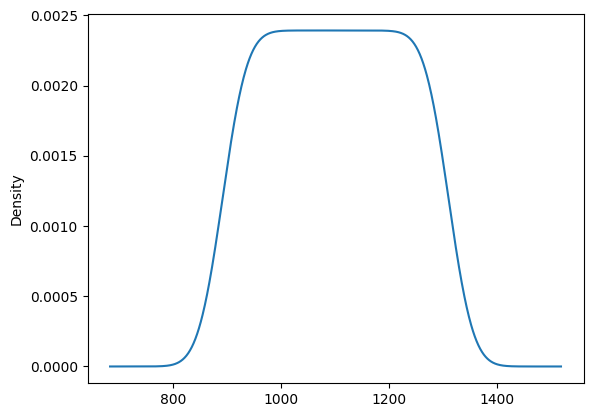

In [7]:
# distribution of PassengerId 
import matplotlib.pyplot as plt
data['PassengerId'].plot(kind = 'kde')

In [8]:
# Sample of 50 people and convert them into list
samples = []
for i in range(100):
    samples.append(data['PassengerId'].sample(50).values.tolist())

In [9]:
len(samples)

100

In [10]:
samples = np.array(samples)
samples

array([[1024,  989, 1268, ...,  964,  951,  929],
       [ 936, 1148, 1109, ..., 1285,  965, 1169],
       [1110, 1061, 1013, ..., 1230, 1266, 1246],
       ...,
       [1190,  933, 1068, ..., 1244, 1108, 1001],
       [1202,  968, 1150, ..., 1111,  977,  898],
       [1142, 1229, 1222, ..., 1023,  952, 1006]])

In [11]:
sampling_mean = samples.mean(axis = 1)
sampling_mean

array([1088.62, 1126.72, 1114.36, 1098.38, 1096.32, 1104.36, 1088.22,
       1083.64, 1118.98, 1085.4 , 1076.76, 1065.54, 1103.8 , 1081.  ,
       1105.54, 1122.96, 1079.6 , 1098.12, 1129.7 , 1098.96, 1100.36,
       1113.44, 1088.4 , 1081.62, 1069.66, 1113.04, 1094.02, 1111.96,
       1093.38, 1095.96, 1107.88, 1102.3 , 1079.96, 1095.18, 1109.62,
       1123.84, 1109.84, 1085.76, 1093.1 , 1097.54, 1124.  , 1104.72,
       1110.4 , 1078.7 , 1101.44, 1104.06, 1097.36, 1101.36, 1081.04,
       1095.58, 1098.66, 1101.08, 1107.48, 1094.32, 1091.38, 1068.48,
       1113.24, 1102.42, 1112.72, 1123.36, 1113.36, 1097.46, 1091.7 ,
       1073.5 , 1098.2 , 1104.88, 1097.38, 1105.64, 1102.16, 1145.  ,
       1102.8 , 1084.06, 1091.58, 1101.4 , 1103.52, 1087.76, 1101.54,
       1088.72, 1120.74, 1083.08, 1080.16, 1105.28, 1097.7 , 1128.8 ,
       1106.92, 1086.04, 1125.02, 1128.26, 1070.86, 1092.04, 1092.94,
       1117.36, 1127.76, 1088.62, 1082.94, 1095.62, 1115.92, 1093.4 ,
       1115.  , 1110

<Axes: ylabel='Density'>

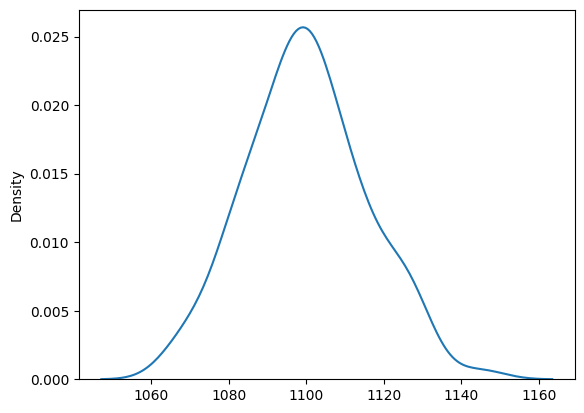

In [12]:
import seaborn as sns
sns.kdeplot(sampling_mean)

In [13]:
sampling_mean.mean()

1100.0104

<Axes: ylabel='Density'>

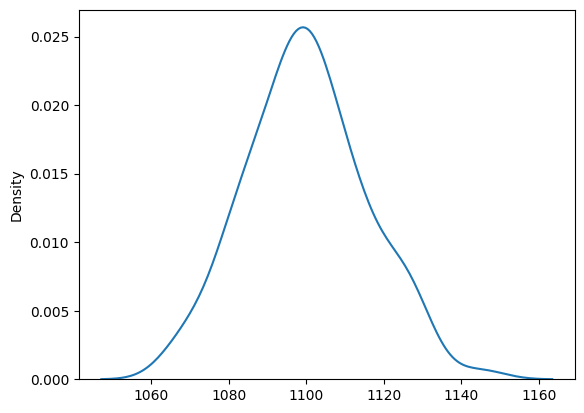

In [14]:
sns.kdeplot(sampling_mean)

In [15]:
sampling_mean.std() / np.sqrt(50)

2.1703212473733005

In [16]:
lower_limit = sampling_mean.mean() - 2 * sampling_mean.std() / np.sqrt(50)
upper_limit = sampling_mean.mean() + 2 * sampling_mean.std() / np.sqrt(50)
print('The range is', lower_limit, '-', upper_limit)

The range is 1095.6697575052533 - 1104.3510424947465


In [17]:
# Find PassengerId's mean
PassengerId_mean = data['PassengerId'].mean()
PassengerId_mean

1100.5

**Sampling Distribution**
it is a kind of representation in probability distribution of mean , std and variance
where we calculate multiple samples that is drawn from the same population, it is used in 
statical analysis and hypothesis testing

**Central limit theorem(CLT)**
The central limit theorem states that the distribution of the sample means of a large number
of independent and identically distributed random variable approach will approach a normal distribution
, regardless of the underlying distribution of the variables.
**The condition required for the CLT(Central limit theorem) to hold are**
1. The sample size is large enough , typically greater than equal to 30.
2. The sample is drawn from a finite population or an infinite population
   with a finite variance.
3. The random variables in the sample are independent and identically distributed.

Note:=>  CLT is important in statistics and Machine learning we can use CLT to construct confidence intervals,
perform hypothesis tests, and make prediction about the population mean based on the sample data, CLT provides
a theoretical Justification such as T-Test, ANOVA and Linear Regression.

**In this workbook I have imported the titenic dataset and performed all these statical calculation on "PassengerId" column**